In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from google.colab import drive 
import os 

**Mount Drive**

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [4]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/linear regression')

In [5]:
# Load the CSV file into a pandas dataframe
path ="Data"
housedata = pd.read_csv(path+"/house.csv")
housedata.head(5)

,home,nbhd,offers,sqft,brick,bedrooms,bathrooms,price
0,1,nbhd02,2,1790,No,2,2,114300
1,2,nbhd02,3,2030,No,4,2,114200
2,3,nbhd02,1,1740,No,3,2,114800
3,4,nbhd02,3,1980,No,3,2,94700
4,5,nbhd02,3,2130,No,3,3,119800


Convert the text features to numeric values. 

In [6]:
def convert_text(text):

  if type(text) == pd.core.series.Series:
    new_dict ={}
    value = 1
    for key in text.unique():
      new_dict[key] = value
      value = value + 1

    text = text.apply(lambda s: new_dict[s])
    return new_dict, text


In [7]:
nbhdfeature , housedata['nbhd'] = convert_text(housedata['nbhd'])
brickfeature , housedata['brick'] = convert_text(housedata['brick'])

In [8]:
housedata.head(5)

,home,nbhd,offers,sqft,brick,bedrooms,bathrooms,price
0,1,1,2,1790,1,2,2,114300
1,2,1,3,2030,1,4,2,114200
2,3,1,1,1740,1,3,2,114800
3,4,1,3,1980,1,3,2,94700
4,5,1,3,2130,1,3,3,119800


Now I will split the dataset based on the train and test parameters and the trainsetsize value.

In [9]:
def split(data, size):
  train = data.sample(frac = size)
  test = data.drop(train.index)
  return train , test

Now we will sove the problem using three different techniques \
1. Gausiian Solver 
2. Cholesky Decompostion 
3. QR Decomposition 

**Gausian Mixture Solver**



In [10]:
def gauss_method(a,b):
  augmentedMatrix = np.hstack((a,b)) * 1.0
  n = augmentedMatrix.shape[0]
  for i in range(0, n):
        
        """Set default pivot value as diagonal matrix """
        pivot = augmentedMatrix[i][i]
        pivotRow = i
        
        """Check for a bigger pivot value"""
        for j in range(i+1, n):
            if abs(augmentedMatrix[j][i]) > abs(pivot):
                pivot = augmentedMatrix[j][i]
                pivotRow = j
                
        """If pivot has changed. Swap the rows"""
        if pivotRow != i:
            for j in range(0, n+1):
                augmentedMatrix[pivotRow][j], augmentedMatrix[i][j] =  augmentedMatrix[i][j], augmentedMatrix[pivotRow][j]
            
        """Make all the column values below pivot as zero by performing matrix row operations"""
        for j in range(i+1, n):
            op = -1 * (augmentedMatrix[j][i]/augmentedMatrix[i][i])
            for k in range(0, n+1):
                augmentedMatrix[j][k] = augmentedMatrix[j][k] + ( op * augmentedMatrix[i][k] )
  beta = np.zeros(n)
  for i in range(n - 1, -1,-1):
      diff = 0
      for k in range (i + 1, n):
          diff = diff + (beta[k] * augmentedMatrix[i][k])
      beta[i] = (augmentedMatrix[i][n] - diff)/augmentedMatrix[i][i]
        

  return beta

**Cholesky Decompostion**

In [11]:
def cholesky_method(a,b):
    a = a *1
    b = b* 1

    n = a.shape[0]
    # Create zero matrix for L
    if a.shape[0] == a.shpae[1]:
      L = np.zeros(shape = a.shpae)
      # Perform the Cholesky decomposition
      for i in range(0,n):
        for k in range(0,n):
          L[i][k] = a[i][k]
          if i == k:
            for m in range(0,j):
              L[i][k] = L[i][k] - (L[i][m] * L[i][m])

            L[i][k] = sqrt(L[i][K])
            break;
          base = 0
          for m in range(0,j):
            base = base + (L[i][m] *L[j][k])
          L[i][k] = (L[i][k] -base)/L[j][j]

      #Forward Substitution
      y = np.zeors(n)
      for i in range(0,n):
        sub = 0
        for m in range(i-1,-1,-1):
          sub = sub + (y[m] *L[i][m])
        y[i] = (b[i] - sub)/L[i][i]

      #Backward Substitution
      beta = np.zeros(n)
      u = np.transpose(L)
      for i in range(n-1,-1,1):
        sub = 0 
        for m in range(i+1,n):
          sub = sub + (beta[m] * u[i][m])
      return beta
            
            

**QR Decomposition**

In [12]:
def QR_solver (a,b):
  a = a*1
  b = b*1
  n = a.shape[1]
  copy = np.arry(a,true)

  for i in range (1, n):
    sub = 0 
    for k in range(i-1,-1,-1):
      sub = sub + (np.dot(copy[:,k],copy[:,k])/np.dot(copy[:,K]),copy[:,K])*copy[:,K]
    copy[:,i] = copy[:,i] - sub

    for i in range(0,n):
      copy[:,i] = copy[:,i]/np.sum(np.square(copy[:,i]))
    
    Q =copy 
    R = np.dot(np.transpose(copy),a)

    b = np.dot(np.transpose(Q),b)

    beta = np.zeros(n)
    for i in range(i-1,-1,-1):
      sub =0
      for m in range(i+1,n):
        sub = sub + (beta[m] * R[i][m])
      beta[i] = (b[i] -sub)/R[i][i]
    return beta


**Calcualate the RMSE**

In [13]:
def rmse(y_true, y_predict):
  n = y_true.shape[0]
  return 1 * np.sqrt(np.sum(np.square(y_true - y_predict)))/n

**Calculate Linear Regression prediction**

In [14]:
def linear_predict(X, M):
  X = np.insert(X,0,1,axis=1)
  return np.dot(X, np.transpose(M))

**Calculate Normal Equation**

In [15]:
def normal_equationSolver(X,Y,S=gauss_method):
  if isinstance(X,np.ndarray) and isinstance(Y,np.ndarray):
        if X.shape[0] != Y.shape[0]:
            raise ValueError("The shape of X and Y is inconsistant")

        X = np.insert(X, 0, 1, axis=1)
        
        Xtranspose = X.T
        XtX = np.dot(Xtranspose,X)
        XtY = np.dot(Xtranspose,Y)
        return S(XtX, XtY)

In [16]:
#Split the dataset innto trainset and test and then the subset xtrain,ytrain,xtest,ytest
train, test = split(housedata,0.8)
ytrain = pd.DataFrame(train,columns=['price']).to_numpy()
ytest = pd.DataFrame(test,columns=['price']).to_numpy()
print(ytrain.shape)
print(ytest.shape)

xtrain = pd.DataFrame(train,columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers']).to_numpy()
xtest = pd.DataFrame(test,columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers']).to_numpy()

(102, 1)
(26, 1)


In [17]:
gausiansolver = normal_equationSolver(xtrain,ytrain)

ypredictGausian = linear_predict(xtest,gausiansolver)

print("RMSE", (rmse(ytest.flatten(),ypredictGausian)))
print("Average Residual", (ytest.flatten() - ypredictGausian).mean())

RMSE 2262.187875779802
Average Residual -4462.906894715051


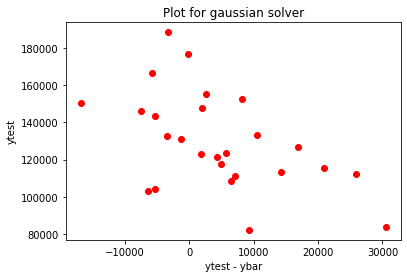

In [18]:
#Plotting the Graph 

plt.plot(ypredictGausian - ytest.flatten(), ytest,"ro",label="ytest - ybar vs ytest")
plt.title("Plot for gaussian solver")
plt.xlabel("ytest - ybar")
plt.ylabel("ytest")
plt.show()

**Solving for Cholesky Decomposition**

In [19]:
#Split the dataset innto trainset and test and then the subset xtrain,ytrain,xtest,ytest
train, test = split(housedata,0.8)
ytrain = pd.DataFrame(train,columns=['price']).to_numpy()
ytest = pd.DataFrame(test,columns=['price']).to_numpy()
print(ytrain.shape)
print(ytest.shape)

xtrain = pd.DataFrame(train,columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers']).to_numpy()
xtest = pd.DataFrame(test,columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers']).to_numpy()

(102, 1)
(26, 1)


In [20]:
Choleskysolver = normal_equationSolver(xtrain,ytrain)

ypredictCholesy = linear_predict(xtest,Choleskysolver)

print("RMSE", (rmse(ytest.flatten(),ypredictCholesy)))
print("Average Residual", (ytest.flatten() - ypredictCholesky).mean())

RMSE 2206.380718038221
Average Residual 2303.0103861923903


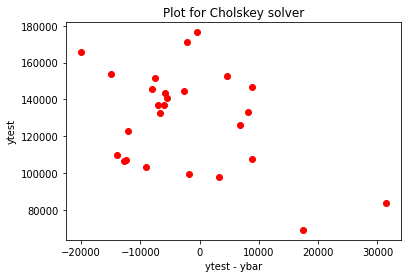

In [21]:
#Plotting the graph 

plt.plot(ypredictCholskey - ytest.flatten(), ytest,"ro",label="ytest - ybar vs ytest")
plt.title("Plot for Cholskey solver")
plt.xlabel("ytest - ybar")
plt.ylabel("ytest")
plt.show()

**Solving for QR Decomposition**

In [22]:
#Split the dataset innto trainset and test and then the subset xtrain,ytrain,xtest,ytest
train, test = split(housedata,0.8)
ytrain = pd.DataFrame(train,columns=['price']).to_numpy()
ytest = pd.DataFrame(test,columns=['price']).to_numpy()
print(ytrain.shape)
print(ytest.shape)

xtrain = pd.DataFrame(train,columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers']).to_numpy()
xtest = pd.DataFrame(test,columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers']).to_numpy()

(102, 1)
(26, 1)


In [23]:
QRsolver = normal_equationSolver(xtrain,ytrain)

ypredictQR = linear_predict(xtest,QRsolver)

print("RMSE", (rmse(ytest.flatten(),ypredictQR)))
print("Average Residual", (ytest.flatten() - ypredictQR).mean())

RMSE 2194.452140861601
Average Residual 577.131606515384


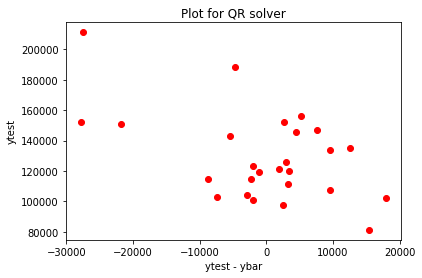

In [24]:
#Plotting the graph 

plt.plot(ypredictQR - ytest.flatten(), ytest,"ro",label="ytest - ybar vs ytest")
plt.title("Plot for QR solver")
plt.xlabel("ytest - ybar")
plt.ylabel("ytest")
plt.show()